# 1. Introduction to SciPy for Mathematicians

## Table of Contents
- Introduction to SciPy
- Linear Algebra
- Optimization
- Finding Roots
- Integration
- ODE's

Next week? Choose among:

- Basic Computations: `numpy` & Python
- Symbolic Mathematics: `sympy`
- Data Science: `pandas`
- Plotting/Data Visualization: (`matplotlib` vs. `plotly`)
- Machine Learning: `keras`, `tensorflow`, `scikit-learn`
- Stochastics/statistics: `random`, `scipy.statistics` , `statsmodels`
- Other: ___________?



### 1.1 Introduction to SciPy

The `SciPy` library is one of the core packages that make up the SciPy stack. The other core packages are `NumPy`, `Matplotlib`, `iPython`, `SymPy` and `pandas`. It provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and statistics.

In [39]:
import scipy

The full documentation of this package can be found by typing `help(scipy)`. The most important info can be found by using `scipy.source(scipy)`, or the following code:

In [40]:
scipy.info(scipy)

SciPy: A scientific computing package for Python

Documentation is available in the docstrings and
online at https://docs.scipy.org.

Contents
--------
SciPy imports all the functions from the NumPy namespace, and in
addition provides:

Subpackages
-----------
Using any of these subpackages requires an explicit import.  For example,
``import scipy.cluster``.

::

 cluster                      --- Vector Quantization / Kmeans
 fftpack                      --- Discrete Fourier Transform algorithms
 integrate                    --- Integration routines
 interpolate                  --- Interpolation Tools
 io                           --- Data input and output
 linalg                       --- Linear algebra routines
 linalg.blas                  --- Wrappers to BLAS library
 linalg.lapack                --- Wrappers to LAPACK library
 misc                         --- Various utilities that don't have
                                  another home.
 ndimage                      --- n-dime

Sometimes it is more convenient to read the documentation online: https://scipy.org/scipylib/index.html.

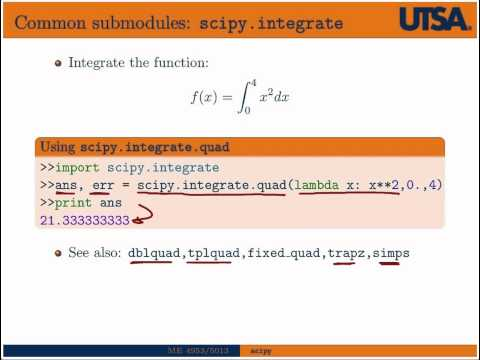

In [41]:
from IPython.display import YouTubeVideo
YouTubeVideo('MtdLd2lrvag')

In [42]:
# print all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # 'last_expr'

### 1.2 Linear Algebra

When `SciPy` is built using the optimized ATLAS LAPACK and BLAS libraries, it has very fast linear algebra capabilities. `scipy.linalg` contains all the functions in `numpy.linalg` plus some other more advanced ones not contained in `numpy.linalg`. Another advantage of using `scipy.linalg` over `numpy.linalg` is that scipy might be faster depending on how numpy was installed. Therefore, unless you don’t want to add scipy as a dependency to your numpy program, always use `scipy.linalg` instead of `numpy.linalg`.

In [43]:
from scipy import linalg
# from scipy.linalg import *
scipy.info(scipy.linalg)

Linear algebra (:mod:`scipy.linalg`)

.. currentmodule:: scipy.linalg

Linear algebra functions.

.. eventually we should replace the numpy.linalg HTML link with just `numpy.linalg`

.. seealso::

   `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
   for more linear algebra functions.  Note that
   although `scipy.linalg` imports most of them, identically named
   functions from `scipy.linalg` may offer more or slightly differing
   functionality.


Basics

.. autosummary::
   :toctree: generated/

   inv - Find the inverse of a square matrix
   solve - Solve a linear system of equations
   solve_banded - Solve a banded linear system
   solveh_banded - Solve a Hermitian or symmetric banded system
   solve_circulant - Solve a circulant system
   solve_triangular - Solve a triangular matrix
   solve_toeplitz - Solve a toeplitz matrix
   det - Find the determinant of a square matrix
   norm - Matrix and vector norm
   lstsq - Solve a linear least-squares pr

Let's do some basic linear algebra using `scipy.linalg`:

In [44]:
import numpy as np

A = np.array([[1,2],[3,4]]) # np.mat('[1 2 ; 3 4]')
print("A =", A)
linalg.inv(A) # inverse
linalg.det(A) # determinant
linalg.expm(A) # e^A
linalg.norm(A,np.inf) # infinity norm (max row sum)

b = np.array([[5,6]]) # 2D array
print("b =", b)
b.shape
b.T

A*b # not matrix multiplication!
A.dot(b.T) # matrix multiplication (easier: @)
linalg.solve(A,b.T)

b = np.array([5,6]) # 1D array
print(b,"\n",b.T)
print(A.dot(b),"\n",A.dot(b.T))

U,S,V = linalg.svd(A)
linalg.hadamard(4)

A = [[1 2]
 [3 4]]


array([[-2. ,  1. ],
       [ 1.5, -0.5]])

-2.0

array([[ 51.9689562 ,  74.73656457],
       [112.10484685, 164.07380305]])

7.0

b = [[5 6]]


(1, 2)

array([[5],
       [6]])

array([[ 5, 12],
       [15, 24]])

array([[17],
       [39]])

array([[-4. ],
       [ 4.5]])

[5 6] 
 [5 6]
[17 39] 
 [17 39]


array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1, -1,  1]])

We can also do some more interesting stuff, like computing eigenvalues and eigenvectors for large matrices:

### 1.3 Optimization

The `scipy.optimize` package provides several commonly used optimization algorithms. A detailed listing is available:

In [45]:
from scipy import optimize
scipy.info(scipy.optimize)

Optimization and Root Finding (:mod:`scipy.optimize`)

.. currentmodule:: scipy.optimize

SciPy ``optimize`` provides functions for minimizing (or maximizing)
objective functions, possibly subject to constraints. It includes
solvers for nonlinear problems (with support for both local and global
optimization algorithms), linear programing,  constrained
and nonlinear least-squares, root finding and curve fitting.

Common functions and objects, shared across different solvers, are:

.. autosummary::
   :toctree: generated/

   show_options - Show specific options optimization solvers.
   OptimizeResult - The optimization result returned by some optimizers.
   OptimizeWarning - The optimization encountered problems.


Optimization

Scalar Functions Optimization
-----------------------------

.. autosummary::
   :toctree: generated/

   minimize_scalar - Interface for minimizers of univariate functions

The `minimize_scalar` function supports the following methods:

.. toctree::

   optimiz

The module contains:
1. Unconstrained and constrained minimization of multivariate scalar functions (`minimize`) using a variety of algorithms (e.g. BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP)
2. Global (brute-force) optimization routines (e.g., `anneal`, `basinhopping`)
3. Least-squares minimization (`leastsq`) and curve fitting (`curve_fit`) algorithms
4. Scalar univariate functions minimizers (`minimize_scalar`) and root finders (`newton`)
5. Multivariate equation system solvers (`root`) using a variety of algorithms (e.g. hybrid Powell, LevenbergMarquardt or large-scale methods such as Newton-Krylov).

#### Example 1: A Simple Function
Consider the following function:
\begin{align*}
f(x) = x^2 + 0.2x + 4\text{cos}(x).
\end{align*}

3

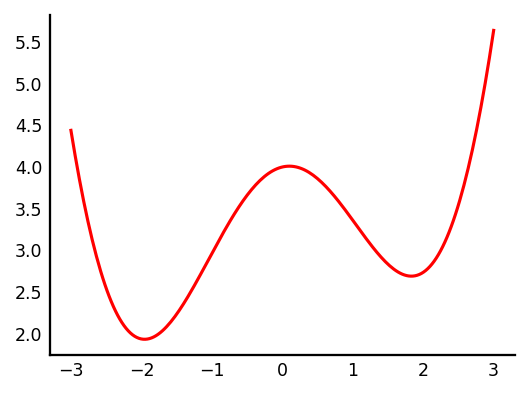

In [46]:
import matplotlib.pyplot as plt

def f(x):
    return x ** 2 + 0.2 * x + 4 * np.cos(x)

def g(x):
    return x**2

x = np.linspace(-3, 3, 200)
plt.plot(x, f(x), 'r-')


# plot2 = plt.plot(x, g(x), 'b-')
# plt2.xlim((-3, 3))
# plot2

a = 3
a

Let's consider the 'BFGS' algorithm:

In [47]:
scipy.info(scipy.optimize.fmin_bfgs)

 fmin_bfgs(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf,
           epsilon=1.4901161193847656e-08, maxiter=None, full_output=0,
           disp=1, retall=0, callback=None)

Minimize a function using the BFGS algorithm.

Parameters
----------
f : callable f(x,*args)
    Objective function to be minimized.
x0 : ndarray
    Initial guess.
fprime : callable f'(x,*args), optional
    Gradient of f.
args : tuple, optional
    Extra arguments passed to f and fprime.
gtol : float, optional
    Gradient norm must be less than gtol before successful termination.
norm : float, optional
    Order of norm (Inf is max, -Inf is min)
epsilon : int or ndarray, optional
    If fprime is approximated, use this value for the step size.
callback : callable, optional
    An optional user-supplied function to call after each
    iteration.  Called as callback(xk), where xk is the
    current parameter vector.
maxiter : int, optional
    Maximum number of iterations to perform.
full_output : bool, optio

Optimization terminated successfully.
         Current function value: 1.931741
         Iterations: 3
         Function evaluations: 27
         Gradient evaluations: 9


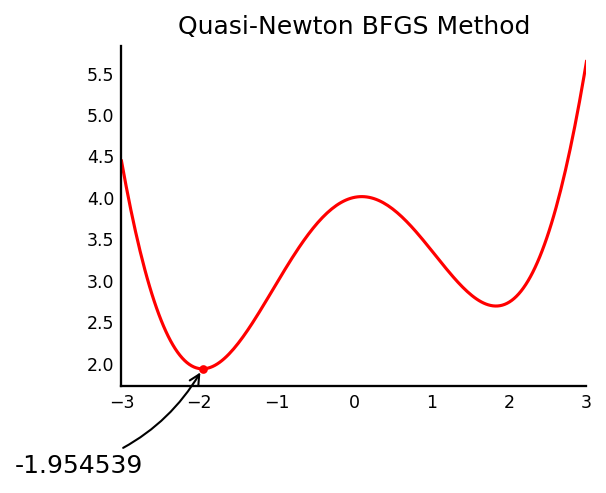

In [48]:
from scipy.optimize import fmin_bfgs

xmin = fmin_bfgs(f, 0)

def show_opt_result(x, f, xmin, opt_title=None):

    plt.plot(x, f(x), 'r-')
    plt.xlim((-3,3))
    plt.scatter([xmin],[f(xmin)], 10, color='red')
    plt.annotate('%f' % xmin, 
            xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
            xytext=(-90, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    if opt_title != None:
        plt.title(opt_title)
    
show_opt_result(x, f, xmin, 'Quasi-Newton BFGS Method')

One problem of this method is that it only finds *local minima*. In our example, we took $x=0$ as initial guess. Look what happens when we start at $x = 1$:

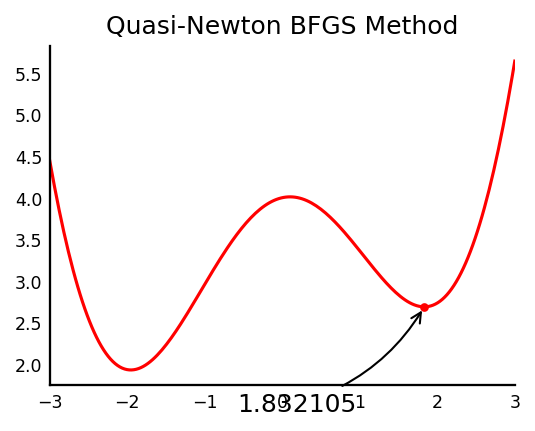

In [49]:
xmin = fmin_bfgs(f, 1, disp=0)
show_opt_result(x, f, xmin, 'Quasi-Newton BFGS Method')

An alternative is using the *brute force* method, that computes the minimum within any given grid:

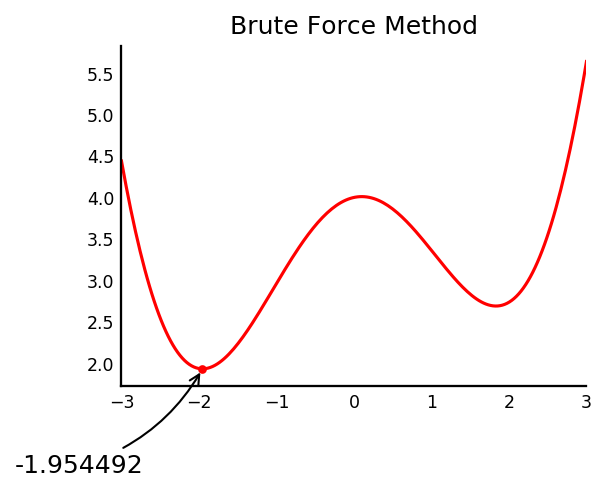

In [50]:
from scipy.optimize import brute

grid = (-3, 3, 0.1)
xmin = brute(f, (grid,))
show_opt_result(x, f, xmin, 'Brute Force Method')

#### Example 2: Rosenbrock Function
We can also optimize multidimensional functions, e.g. the Rosenbrock function:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/1920px-Rosenbrock_function.svg.png" align="center" width="250">

In [51]:
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function."""
    return sum(100 * (x[1:] - x[:-1] ** 2) ** 2 + (1 - x[:-1]) ** 2)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

print("\nOptimization:\n",res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571

Optimization:
  final_simplex: (array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.00000001, 1.00000001],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99999999]]), array([4.86115343e-17, 7.65182843e-17, 8.11395684e-17, 8.63263255e-17,
       8.64080682e-17, 2.17927418e-16]))
           fun: 4.861153433422115e-17
       message: 'Optimization terminated successfully.'
          nfev: 571
           nit: 339
        status: 0
       success: True
             x: array([1., 1., 1., 1., 1.])


In [52]:
scipy.info(scipy.optimize.minimize)

 minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None,
          bounds=None, constraints=(), tol=None, callback=None, options=None)

Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where x is an 1-D array with shape (n,) and `args`
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <optimize.minimize-powell>`
        - 'CG'          :ref:`(see here) 

#### Example 3: Computing the Optimal Image Shift

The following example is adapted from *Elegant SciPy* (Chapter 7):
<img src="https://covers.oreillystatic.com/images/0636920038481/lrg.jpg" align="center" width="250">

Let's start with the simplest version of the problem: we have two
images, one shifted relative to the other.  We wish to recover the
shift that will best align our images. Our optimization function will "jiggle" one of the images, and see
whether jiggling it in one direction or another reduces their
dissimilarity.  By doing this repeatedly, we can try to find the
correct alignment.

We will shift an image of the astronaut Eileen Collins by `83` pixels to the right then comparing it back to the original until we find the shift that best matches. Obviously this is a silly thing to do, as we know the original position, but this way we know the truth, and we can check how our algorithm is doing. Here's the original and shifted image.

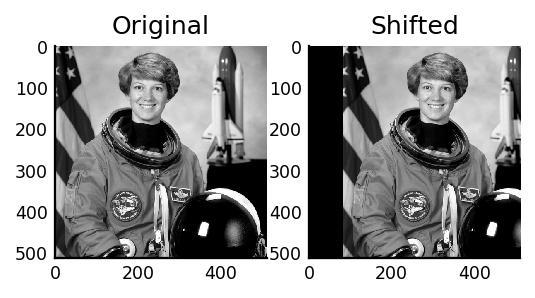

In [55]:
import matplotlib.pyplot as plt
plt.style.use('resources/elegant.mplstyle')

from skimage import data, color
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

astronaut = color.rgb2gray(data.astronaut())
shifted = ndi.shift(astronaut, (0, 83))

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(astronaut)
axes[0].set_title('Original')
axes[1].imshow(shifted)
axes[1].set_title('Shifted');

<!-- caption text="Horizontally shifting an image" -->

For the optimization algorithm to do its work, we need some way of defining "dissimilarity"—i.e., the cost function.  The easiest way to do this is to simply calculate the average of the squared differences, i.e., the *mean squared error*, or MSE.

In [56]:
def mse(x,y):
    """Computes the mean squared error between two arrays."""
    return np.mean((x - y) ** 2)

This will return `0` when the images are perfectly aligned, and a higher
value otherwise. With this cost function, we can check whether two images are aligned:

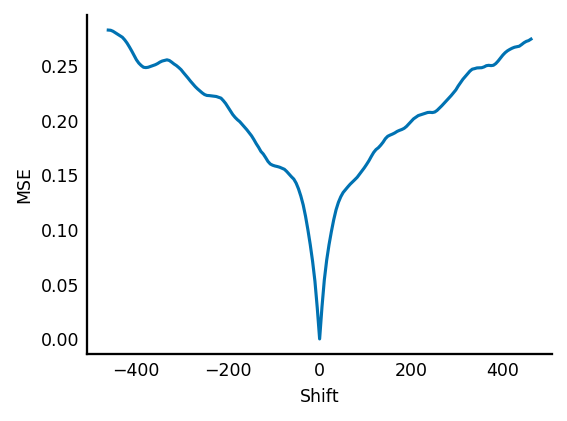

In [57]:
ncol = astronaut.shape[1]

# Cover a distance of 90% of the length in columns,
# with one value per percentage point
shifts = np.linspace(-0.9 * ncol, 0.9 * ncol, 181)
mse_costs = []

for shift in shifts:
    shifted1 = ndi.shift(astronaut, (0, shift))
    mse_costs.append(mse(astronaut, shifted1))

fig, ax = plt.subplots()
ax.plot(shifts, mse_costs)
ax.set_xlabel('Shift')
ax.set_ylabel('MSE');

<!-- caption text="Mean squared error as a function of horizontal shift of the
transformed image" -->

With the cost function defined, we can ask `scipy.optimize.minimize`
to search for optimal parameters:

In [58]:
from scipy import optimize

def astronaut_shift_error(shift, image):
    corrected = ndi.shift(image, (0, shift))
    return mse(astronaut, corrected)

res = optimize.minimize(astronaut_shift_error, 0, args=(shifted,),method='Powell')

print(f'The optimal shift for correction is: {res.x}')

The optimal shift for correction is: -82.99999981933608


It worked! We shifted it by `+83` pixels, and, thanks to our MSE measure, SciPy's
`optimize.minimize` function has given us the correct amount of shift (`-83`) to
get it back to its original state.

<!-- caption text="Mean squared error as a function of shift from the original
image" -->

Starting at zero shift, have a look at the MSE value as the shift becomes
increasingly negative: it increases consistently until around -300
pixels of shift, where it starts to decrease again! Only slightly, but it
decreases nonetheless. The MSE bottoms out at around -400, before it
increases again. This is called a *local minimum*.
Because optimization methods only have access to "nearby"
values of the cost function, if the function improves by moving in the "wrong"
direction, the `minimize` process will move that way regardless. So, if we
start by an image shifted by -340 pixels:

In [59]:
shifted2 = ndi.shift(astronaut, (0, -340))

Instead of recovering the original image, `minimize` will shift it by a further `40` pixels or so:

In [60]:
res = optimize.minimize(astronaut_shift_error, 0, args=(shifted2,), method='Powell')
print(f'The optimal shift for correction is {res.x}')

The optimal shift for correction is -38.51778619396494


However, shifting by `340` pixels would indeed give the least MSE:

In [61]:
space = np.linspace(0,400,41)

for point in space:
    print(int(point), astronaut_shift_error(point, shifted2))

0 0.25458834639388056
10 0.25650207062907715
20 0.25313118331564544
30 0.24847905737087253
40 0.24448717467951436
50 0.2402304424963223
60 0.2369077502669345
70 0.2359696238467892
80 0.2360557092785759
90 0.23684647625054997
100 0.24144776884791824
110 0.24639612694207957
120 0.250462091364242
130 0.25265073342568906
140 0.25120035973532157
150 0.24849663599763855
160 0.24552383460773866
170 0.2416429479050463
180 0.23644257583104378
190 0.23237387952342595
200 0.22819574805990345
210 0.22551843175970743
220 0.2250673769672724
230 0.22552633534837574
240 0.22733577852555956
250 0.22905980748620297
260 0.22905349504781403
270 0.2270485409605741
280 0.22466936255842973
290 0.22289540960711196
300 0.22078492915866257
310 0.21772664632915825
320 0.21127566242933293
330 0.2004227497143783
340 0.18541323814319766
350 0.2103278111916292
360 0.23096741692510078
370 0.24591839466109022
380 0.2553130990389651
390 0.26158232338808673
400 0.2651635646315796


The common solution to this problem is to smooth or downscale the images, which
has the dual result of smoothing the objective function. Have a look at the
same plot, after having smoothed the images with a Gaussian filter:

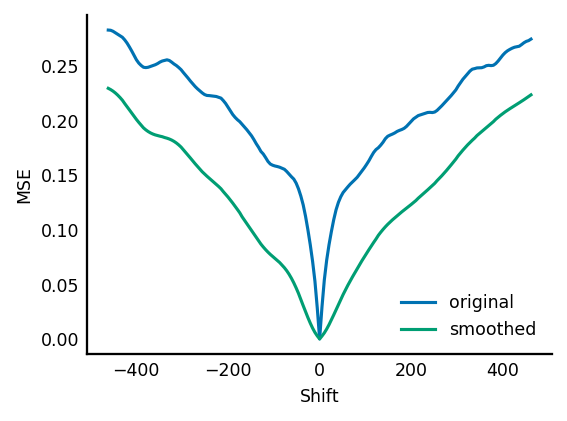

In [62]:
from skimage import filters

astronaut_smooth = filters.gaussian(astronaut, sigma=20)

mse_costs_smooth = []
shifts = np.linspace(-0.9 * ncol, 0.9 * ncol, 181)
for shift in shifts:
    shifted3 = ndi.shift(astronaut_smooth, (0, shift))
    mse_costs_smooth.append(mse(astronaut_smooth, shifted3))

fig, ax = plt.subplots()
ax.plot(shifts, mse_costs, label='original')
ax.plot(shifts, mse_costs_smooth, label='smoothed')
ax.legend(loc='lower right')
ax.set_xlabel('Shift')
ax.set_ylabel('MSE');

### 1.4 Finding Roots

In [63]:
help(scipy.optimize.root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver.  Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <opti

#### Example 1: One-Dimensional Root Finding
Consider the following equation:
\begin{align*}
x^2 + 0.2x + 4\text{cos}(x) - 3 = 0.
\end{align*}

(-3, 3)

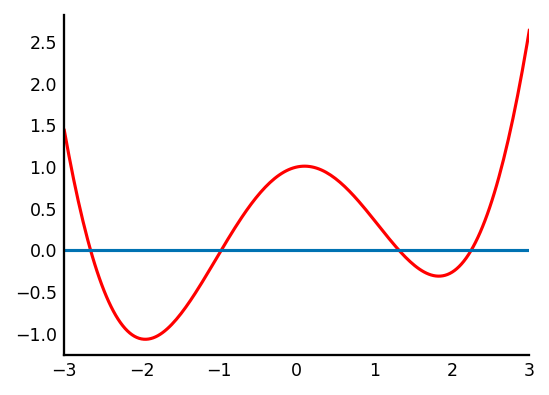

In [64]:
def f(x):
    return x ** 2 + 0.2 * x + 4 * np.cos(x) - 3

x = np.linspace(-3, 3, 200)
plt.plot(x, f(x), 'r-')
plt.plot(x,np.zeros(200))
plt.xlim((-3, 3))
plt.show()

A root can be found as follows:

In [65]:
optimize.root(f,0)

    fjac: array([[-1.]])
     fun: array([8.8817842e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([7.73776154e-10])
       r: array([1.03573143])
  status: 1
 success: True
       x: array([1.31913243])

In [66]:
optimize.newton(f,0)

2.2501224766393197

In [67]:
optimize.brentq(f,0,2)

1.3191324291411353

In [68]:
optimize.fsolve(f,0)

array([1.31913243])

### 🔴 *Homework: Find all roots.*

#### Example 2: Multidimensional Root Finding
Using the last method (`fsolve`), we can also solve a set of equations, e.g.
\begin{align*}
\begin{cases}
x_0 \text{cos}(x_1) &= 4, \\
x_0 x_1 - x_1 &= 5.
\end{cases}
\end{align*}

In [69]:
def g(x):
    return [x[0] * np.cos(x[1]) - 4, x[0] * x[1] - x[1] - 5]

optimize.root(g,(1,1), method='hybr')

    fjac: array([[-0.56248005, -0.82681085],
       [ 0.82681085, -0.56248005]])
     fun: array([3.73212572e-12, 1.61710645e-11])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([6.25677420e-08, 2.40104774e-08])
       r: array([-1.0907073 , -1.7621827 , -7.37420598])
  status: 1
 success: True
       x: array([6.50409711, 0.90841421])

### 1.5 Integration

In [70]:
from scipy import integrate
scipy.info(scipy.integrate)

Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulati

#### Example 1: One-Dimensional Integration

Suppose that we want to compute a numerical value for the integral
\begin{align*}
E_n(x) = \int_{1}^{\infty}\frac{e^{-xt}}{t^n}\mathrm{d}t.
\end{align*}
We can do this as follows:

In [71]:
def integrand(t,n,x):
    return np.exp(-x * t) / t ** n

def E(n,x):
    return integrate.quad(integrand, 1, np.Inf, args=(n,x))[0]

n = 3
vec_E = np.vectorize(E)
vec_E(n,np.arange(1.0,4.0,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

#### Example 2: Two-Dimensional Integration

Consider the integral
\begin{align*}
I =
\int_{0}^{1/2}\int_{0}^{1-2x}xy\mathrm{d}y\mathrm{d}x = \frac{1}{96} \approx 0.0104.
\end{align*}
To compute this, we use the function `dblquad`:

In [72]:
def f(x,y):
    return x * y

integrate.dblquad(f, 0, 0.5, 0, lambda x: 1 - 2 * x)

(0.010416666666666668, 4.101620128472366e-16)

For $n$-fold integration, scipy provides the function `nquad`.

### 1.6 ODE's

Ordinary differential equations (ODEs) can also be solved in Python with the `scipy.integrate` package, namely using the function `odeint`. The function requires three inputs (`y = odeint(model, y0, t)`):

In [73]:
help(integrate.odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

#### Example: A Simple ODE

Consider the differential equation
\begin{align*}
\frac{\mathrm{d}y}{\mathrm{d}t} = -k y(t),
\end{align*}
with parameter $k\in (0,1)$ and initial condition $y_0=5$.

Text(0.5, 0, 'time')

Text(0, 0.5, 'y(t)')

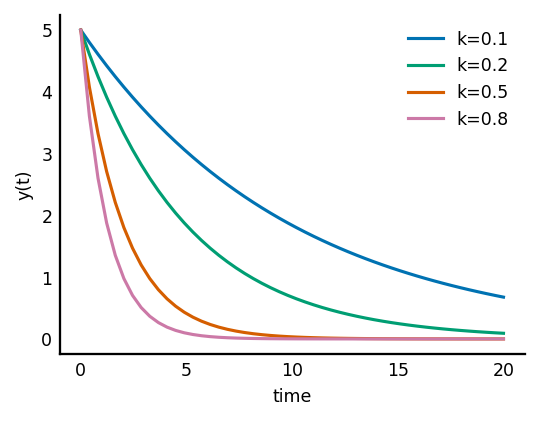

In [74]:
from scipy.integrate import odeint

y0 = 5
t = np.linspace(0,20,50)

def model(y,t,k):
    """Returns dy/dt."""
    return -k * y

for k in [0.1,0.2,0.5,0.8]:
    y = odeint(model,y0,t,args=(k,))
    plt.plot(t,y)

plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend(['k=0.1','k=0.2','k=0.5','k=0.8'])
plt.show()

### Want to know more about SciPy? Check out 'Google Drive'.

### 🔴 *Next Week:*

`pandas` and `scikit-learn`